<a href="https://colab.research.google.com/github/laroccathebrux/-DS-Concrete/blob/main/Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
tf.__version__

'2.2.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Concrete.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

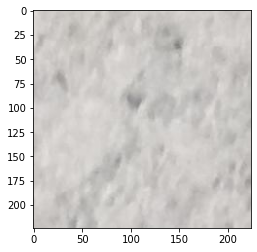

In [ ]:
image = tf.keras.preprocessing.image.load_img(r'/content/Concrete/Train/Negative/19925.jpg', target_size=(224,224))
plt.imshow(image);

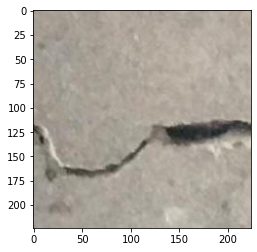

In [ ]:
image = tf.keras.preprocessing.image.load_img(r'/content/Concrete/Train/Positive/00042.jpg', target_size=(224,224))
plt.imshow(image);

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   )

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/Concrete/Train',
                                                    target_size = (224, 224),
                                                    batch_size=16,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 160 images belonging to 2 classes.


In [ ]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_train

10

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [ ]:
test_generator = test_datagen.flow_from_directory('/content/Concrete/Test',
                                                  target_size=(224,224),
                                                  batch_size=1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 60 images belonging to 2 classes.


In [ ]:
step_size_test = test_generator.n // test_generator.batch_size
step_size_test

60

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

In [ ]:
model = tf.keras.Model(inputs = base_model.input, outputs = preds)

In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
for layer in model.layers[:175]:
  layer.trainable = False 
for layer in model.layers[175:]:
  layer.trainable = True  

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_generator,
                              epochs=20,
                              steps_per_epoch=step_size_train,
                              validation_data = test_generator,
                              validation_steps=step_size_test)

Epoch 1/20
10/10 [==============================] - 31s 3s/step - loss: 0.2224 - accuracy: 0.9312 - val_loss: 0.3185 - val_accuracy: 0.9500
Epoch 2/20
10/10 [==============================] - 28s 3s/step - loss: 0.0150 - accuracy: 0.9937 - val_loss: 0.2504 - val_accuracy: 0.9500
Epoch 3/20
10/10 [==============================] - 28s 3s/step - loss: 0.0117 - accuracy: 0.9937 - val_loss: 0.7428 - val_accuracy: 0.9333
Epoch 4/20
10/10 [==============================] - 28s 3s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1854 - val_accuracy: 0.9833
Epoch 5/20
10/10 [==============================] - 27s 3s/step - loss: 7.4506e-10 - accuracy: 1.0000 - val_loss: 5.9588e-04 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 28s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 7/20
10/10 [==============================] - 28s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9833
Epoc

In [ ]:
model.save('/content/drive/My Drive/Concrete.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Concrete.model/assets


In [ ]:
np.mean(history.history['val_accuracy'])

0.9783333450555801

In [ ]:
np.std(history.history['val_accuracy'])

0.015000005894238591

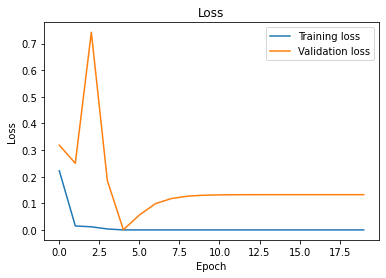

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend();

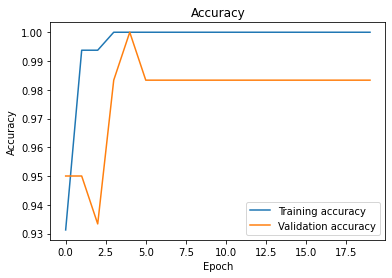

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend();

In [ ]:
filenames = test_generator.filenames
filenames

['Negative/00001.jpg',
 'Negative/00002.jpg',
 'Negative/00003.jpg',
 'Negative/00004.jpg',
 'Negative/00005.jpg',
 'Negative/00006.jpg',
 'Negative/00007.jpg',
 'Negative/00008.jpg',
 'Negative/00009.jpg',
 'Negative/00010.jpg',
 'Negative/00011.jpg',
 'Negative/00012.jpg',
 'Negative/00013.jpg',
 'Negative/00014.jpg',
 'Negative/00015.jpg',
 'Negative/00016.jpg',
 'Negative/00017.jpg',
 'Negative/00018.jpg',
 'Negative/00019.jpg',
 'Negative/00020.jpg',
 'Negative/00021.jpg',
 'Negative/00022.jpg',
 'Negative/00023.jpg',
 'Negative/00024.jpg',
 'Negative/00025.jpg',
 'Negative/00026.jpg',
 'Negative/00027.jpg',
 'Negative/00028.jpg',
 'Negative/00029.jpg',
 'Negative/00030.jpg',
 'Positive/00001.jpg',
 'Positive/00002.jpg',
 'Positive/00003.jpg',
 'Positive/00004.jpg',
 'Positive/00005.jpg',
 'Positive/00006.jpg',
 'Positive/00007.jpg',
 'Positive/00008.jpg',
 'Positive/00009.jpg',
 'Positive/00010.jpg',
 'Positive/00011.jpg',
 'Positive/00012.jpg',
 'Positive/00013.jpg',
 'Positive/

In [ ]:
predictions = model.predict(test_generator, steps = len(filenames))
predictions

array([[1.00000000e+00, 2.81570428e-17],
       [1.00000000e+00, 1.06054184e-24],
       [1.00000000e+00, 7.26653011e-25],
       [1.00000000e+00, 3.71653948e-24],
       [1.00000000e+00, 4.28555910e-20],
       [1.00000000e+00, 3.53520078e-18],
       [1.00000000e+00, 1.74152998e-22],
       [1.00000000e+00, 6.01037604e-23],
       [1.00000000e+00, 5.54762409e-18],
       [1.00000000e+00, 8.78132870e-20],
       [5.28759673e-29, 1.00000000e+00],
       [1.16147380e-13, 1.00000000e+00],
       [3.78585353e-24, 1.00000000e+00],
       [1.99091388e-17, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.09388262e-22, 1.00000000e+00],
       [1.81984778e-34, 1.00000000e+00],
       [8.20161780e-16, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.53269111e-22, 1.00000000e+00],
       [3.91745806e-01, 6.08254254e-01],
       [1.11773948e-24, 1.00000000e+00],
       [7.82045812e-31, 1.00000000e+00],
       [2.62834032e-26, 1.00000000e+00],
       [2.438522

In [ ]:
predictions2 = []
for i in range(len(predictions)):
  #print(predictions[i])
  predictions2.append(np.argmax(predictions[i]))
predictions2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
test_generator.class_indices

{'Negative': 0, 'Positive': 1}

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(predictions2, test_generator.classes)

0.35

In [ ]:
cm = confusion_matrix(predictions2, test_generator.classes)
cm

array([[11, 20],
       [19, 10]])

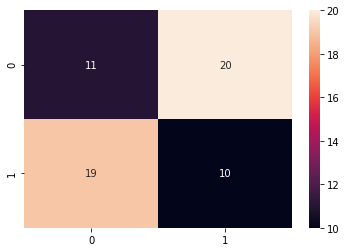

In [ ]:
sns.heatmap(cm, annot=True);

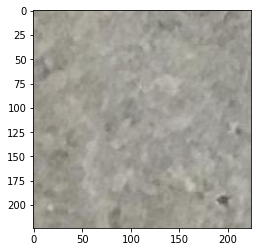

In [ ]:
image = tf.keras.preprocessing.image.load_img(r'/content/Concrete/Test/Negative/00008.jpg', target_size=(224,224))
plt.imshow(image);

In [ ]:
image = tf.keras.preprocessing.image.img_to_array(image)
np.shape(image)

(224, 224, 3)

In [ ]:
image = np.expand_dims(image, axis = 0)
np.shape(image)

(1, 224, 224, 3)

In [ ]:
image = tf.keras.applications.resnet50.preprocess_input(image)

In [ ]:
predictions = model.predict(image)
print(predictions)

[[1.0000000e+00 1.1551881e-17]]


In [ ]:
prediction = list(train_generator.class_indices)[np.argmax(predictions[0])]
prediction

'Negative'